**Оглавление** 

1. [Загрузка данных](#1)
2. [Предобработка данных](#2)
3. [Исследовательский анализ данных](#3)
4. [Портрет пользователя каждого региона](#4)
5. [Проверьте гипотезы](#5)
6. [Вывод](#6)

# Исследование продаж компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017 год. 

Цель исследования: анализ состояния рынка компьютерных игр, оценка объемов продаж, а также определение факторов, влияющих на продажи для построения прогноза на 2017 год.

Данные для анализа: сведения о продажах игр за период с 1980 по 2016 года на различных платформах в разрезе регионов продаж. Данные также содержат информацию об оценках критиков, оценках пользователей и рейтинге ESRB.

В ходе исследования мы выясним:
- наиболее популярные и потенциально прибыльные платформы;
- наиболее популярные и потенциально прибыльные жанры;
- влияют ли рейтинги экспертов и пользователей на продажи игр;
- как отличаются предпочтения пользователей в разных регионах;
- влияет ли рейтинг ESRB на продажи в разных регионах.

Кроме того, мы проверим 2 гипотезы:
- гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

<a id="1"></a>
## Загрузка данных

Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

Выведем первые 10 строчек датафрейма data на экран.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 11 столбцов и 16715 строк. Из основной информации видно, что датафрейм имеет следующее проблемы:

- названия столбцов содержат заглавные буквы;
- столбцы 'Year_of_Release' и 'User_Score' имеют неверные типы данных;
- в 6 из 11 столбцов имеются пропущенные значения.

<a id="2"></a>
## Предобработка данных

**2.1 Работа с названиями столбцов**

Все столбцы датафрейма имеют в названии заглавные буквы, что неудобно для дальнейшей работы. Переименуем их и приведем названия к единому стилю.

In [5]:
# изменение наименования столбцов
data.columns = data.columns.str.lower()
# вывод наименований столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2 Работа с пропусками и типом данных**

Выведем количество пропущенных значений для каждого столбца.

In [6]:
# вывод количества пропусков в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах 'name' и 'genre' имеются по 2 пропуска. Анализ показал, что эти пропуски находятся в одних и тех же строках. Видимо при отсутствии названия игры не было возможности указать жанр игры. Данные строки можно удалить из датафрейма в виду их малого количества.

Количество строк с пропущенными значениями в столбце 'year_of_release' составляет 269 шт. или 1.6% от всех значений. Данные строки также можно удалить из датафрейма. Это существенно не повлияет на достоверность анализа данных.

In [7]:
# удаление строк с пропущенными значениями в столбце year_of_release
data = data.dropna(subset = ['name', 'year_of_release']).reset_index(drop=True)

Столбец 'year_of_release' тип данных float несмотря на то, что год - это целое число. Для удобства в дальнейшем изменим тип данных на int.

In [8]:
# изменение типа данных в столбце year_of_release
data['year_of_release'] = data['year_of_release'].astype('int') 

В столбце 'rating' отсутствует более 6 тыс. значений. В данном столбце указывается возрастной ценз компьютерных игр по системе ESRB, которая определяет рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 
Заполнить эти пропуски невозможно, поскольку данная система не действует в других странах. Если игра не продается в Северной Америке, то и рейтинга ESRB у нее не будет. Для того, чтобы мы могли в дальнейшем использовать данные строки для анализа, заменим пустые значение на n/a (not available).

In [9]:
# замена пропусков на значение n/a
data['rating'] = data['rating'].fillna('n/a')

Пропуски в столбцах 'critic_score' и 'user_score' оставляем незаполненными. Эти показатели не зависят от других показателей датафрейма, в связи с чем заполнение пропусков невозможно.

Также следует отметить, что столбец 'user_score' содержит числовые данные, однако при этом имеет тип данных object. Для того, чтобы выяснить причину, выведем перечень уникальных значений столбца.

In [10]:
# вывод всех уникальных значений столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' помимо числовых значений присутствует аббревиатура 'tbd', что расшифровывается как "to be determined" или "будет определено". Это означает, что игра находится в процессе оценки, но сама оценка пока не проставлена (вероятно не набралось нужного количества оценок для возможности ее публикации). По сути это означает, что оценка у игры отсутствует. В связи с этим произведем замену значения 'tbd' на значение 'NaN'. Затем преобразуем данные в тип float, поскольку тип object не позволит нам в дальнейшем проводить анализ данного столбца (object - текстовый формат, не позволяющий проводить математические действия над данными).

In [11]:
# замена значения 'tbd' на 'NaN', изменение типа данных
data['user_score'] = data['user_score'].replace('tbd', 'NaN').astype('float') 

Выведем основную информацию о датафрейме с помощью метода info().

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


После проведенных изменений стало видно, что в столбцах 'critic_score' и 'user_score' отсутствует примерно одинаковое количество значений. Возможно между ними имеется взаимосвязь. Проверим это. В отдельную переменную сохраним срез данных, где будут только те строки датафрейма, где отсутствуют значения в столбце 'critic_score'. Затем выведем основную информацию о полученном срезе.

In [13]:
data_score = data.query('critic_score.isna()')
data_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8461 entries, 1 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8461 non-null   object 
 1   platform         8461 non-null   object 
 2   year_of_release  8461 non-null   int32  
 3   genre            8461 non-null   object 
 4   na_sales         8461 non-null   float64
 5   eu_sales         8461 non-null   float64
 6   jp_sales         8461 non-null   float64
 7   other_sales      8461 non-null   float64
 8   critic_score     0 non-null      float64
 9   user_score       569 non-null    float64
 10  rating           8461 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 760.2+ KB


Данные в столбце 'user_score' практически отсутствуют. Таким образом около 7900 игр не имеют ни оценки критиков, ни оценки пользователей. Возможно, причиной этого является то, часть игр не оценивается критиками и пользователями (в т.ч. нишевые игры).  

**2.3 Обработка дубликатов**

Проверим наличие явных и неявных дубликатов в датафрейме.

In [14]:
# создадим копию датафрейма
data_dup = data.copy()
# приведем данные столбца name к нижнему регистру
data_dup['name'] = data_dup['name'].str.lower()
# проверим наличие дубликатов
data_dup.duplicated().sum()

0

Явные и неявные дубликаты отсутствуют

**2.4 Добавление в таблицу новых столбцов**

Добавим в таблицу столбец c суммарными продажами во всех регионах.

In [15]:
# добавление столбца total_sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<a id="3"></a>
## Исследовательский анализ данных

***Изучим, сколько игр выпускалось в разные годы***

In [16]:
# сгруппируем данные по столбцу year_of_release, вычислим количество вышедших игр 
data.groupby('year_of_release')['year_of_release'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Для наглядности построим график.

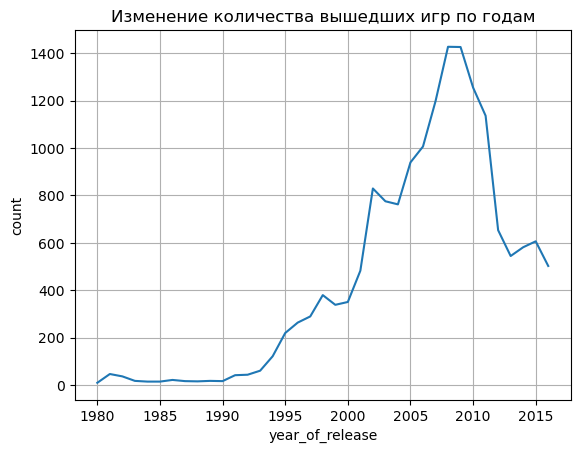

In [17]:
# сгруппируем данные по столбцу year_of_release, вычислим количество вышедших игр и построим график
data.groupby('year_of_release')['total_sales'].agg('count').plot(title = 'Изменение количества вышедших игр по годам',
                                                                 grid = True, ylabel = 'count');

В период с 1980 по 1993 года в год выпускалось не более 100 игр. С 1994 до 2000 года наблюдался умеренный рост количества выпускаемых игр. С 2000 года происходит стремительный рост, который достигает своего пика в 2008 году на отметке 1427 игр за год. Далее идет снижение, а с 2014 года опять начинается умеренный рост.  

На основании сводной информации можно сделать вывод, что данные за 2016 год являются неполными, поскольку в мы видим значительный спад по сравнению с 2015 годом, тогда как до этого была заметна тенденция к росту количества выпускаемых игр. Неполные данные могут привести к неверным выводам. В связи с этим данные за 2016 год не подходят для проведения анализа с целью построения прогноза на 2017 год.

Актуальным для построения прогноза на 2017 год является период с 2013 по 2015 год, поскольку этот период и наиболее однородный и отражает текущие тенденции в изменении количества выходящих игр за год.

***Посмотрим, как менялись продажи по платформам***

Выведем 7 платформ с наибольшими суммарными продажами за весь период наблюдений.

In [18]:
(
    # сделаем свод по столбцу platform и вычислим суммарное количество продаж
    data.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum')
    # отсотрируем в порядке убывания
    .sort_values(by = 'total_sales', ascending = False)
    # выведем первые 7 строк
    .head(7)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


Наибольшее количество продаж приходится на игры с платформы PS2 - 1 233 млн. копий. Платформы X360 и PS3 имеют суммарные продажи более 900 млн. копий каждая. Далее следуют платформы Wii, DS, PS и PS4. 

Построим распределение продаж по годам по 7 платформам с наибольшими суммарными продажами.

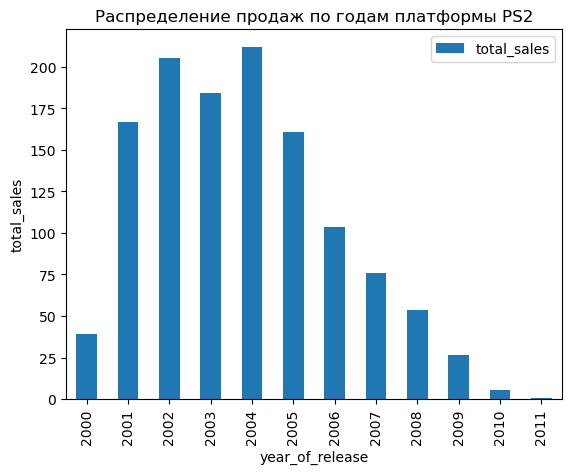

In [19]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "PS2"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы PS2', legend = True, ylabel = 'total_sales')
);

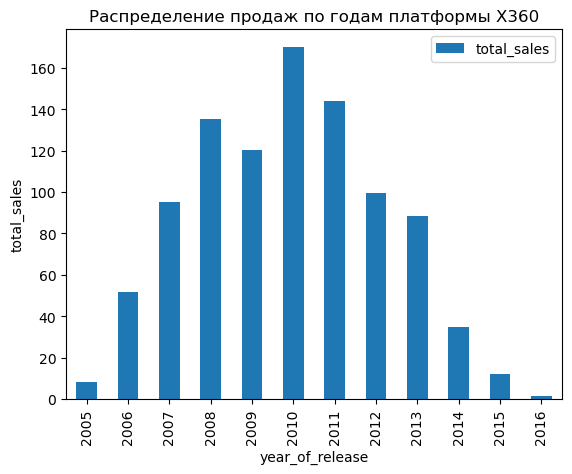

In [20]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "X360"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы X360', legend = True, ylabel = 'total_sales')
);

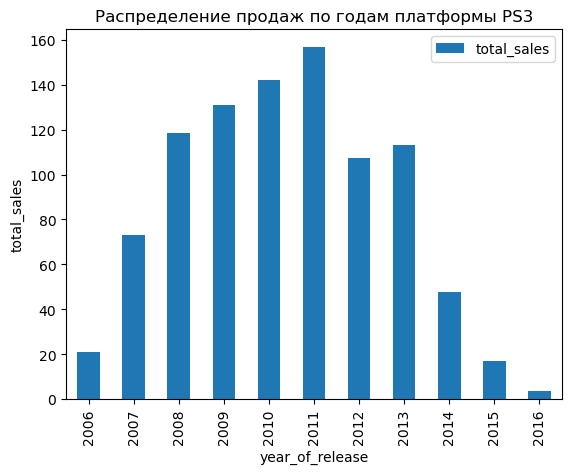

In [21]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "PS3"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы PS3', legend = True, ylabel = 'total_sales')
);

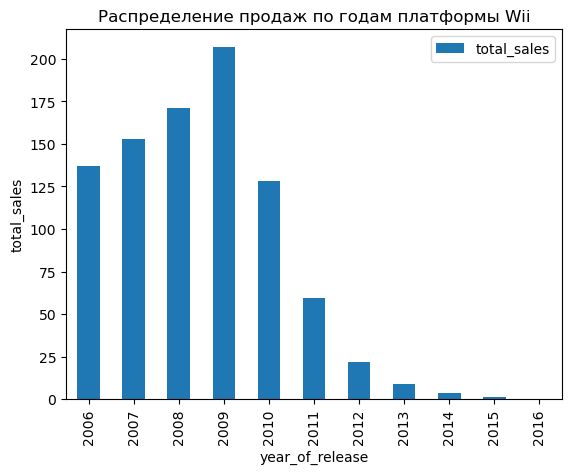

In [22]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "Wii"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы Wii', legend = True, ylabel = 'total_sales')
);

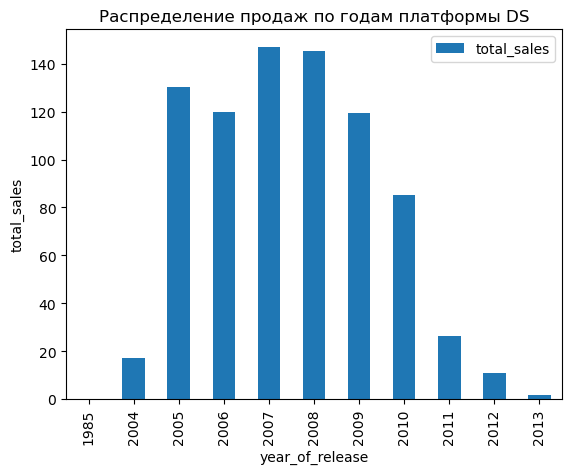

In [23]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "DS"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы DS', legend = True, ylabel = 'total_sales')
);

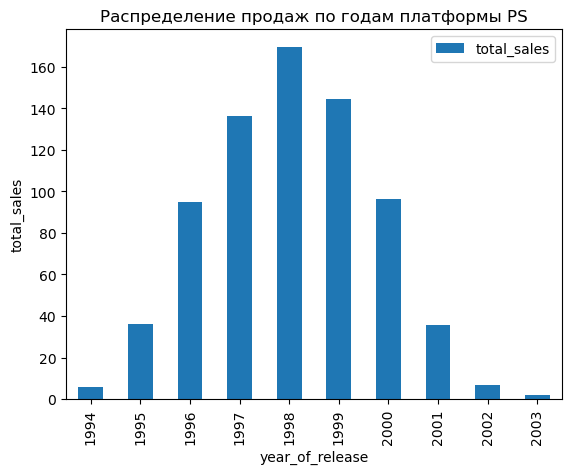

In [24]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "PS"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы PS', legend = True, ylabel = 'total_sales')
);

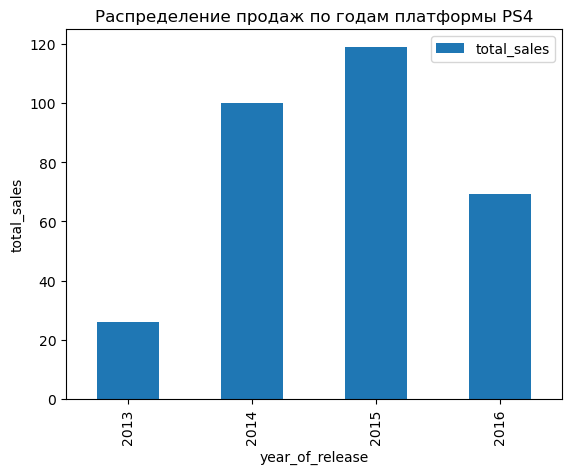

In [25]:
(
    # сделаем срез данных по нужной платформе
    data.query('platform == "PS4"')
    # сделаем свод по столбцу year_of_release и вычислим суммарное количество продаж
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # построим график
    .plot(kind = 'bar', title = 'Распределение продаж по годам платформы PS4', legend = True, ylabel = 'total_sales')
);

Проанализировав 7 наиболее продаваемых платформ, можно сделать вывод о том, что продажи на каждой из платформ в среднем длятся 10 лет. Однако есть и исключения. Например, игры с платформы DS продавались почти 30 лет.

Далее изучим как часто появляются новые и исчезают старые платформы. Данные возьмем за период, когда начался стремительный рост продаж игр, а именно с 2000 года. Данные за более ранние периоды не представляют интереса в связи с их незначительностью.

In [26]:
(
    # сделаем срез данных, убрав данные до 2000 года
    data.query('year_of_release > 1999')
    # сделаем свод по столбцу platform и выведем количество продаж в каждом году
    .pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .fillna('-')
)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,-,63.2,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,-,-,-,-,0.02,0.04,-,-,-,-,-,-,-,-
DS,-,-,-,-,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,-,-,-
GB,19.76,9.24,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.4,-,-,-,-,-,-,-,-,-
GC,-,26.34,51.81,50.61,28.82,27.62,11.26,0.27,-,-,-,-,-,-,-,-,-
N64,33.97,3.25,0.08,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,-,-,-,-,-,-,-,-,-,-,-,-,-


Новые платформы появляются примерно 1 раз в 2-3 года. Закрытие платформ происходит немного реже.

***Создание данных за актуальный период***

Как уже говорилось ранее, актуальным для построения прогноза на 2017 год является период с 2013 по 2015 год, поскольку этот период и наиболее однородный, отражает текущие тенденции в изменении количества выходящих игр за год, а также учитывает средний период открытия и закрытия платформ. 

В отдельной переменной data_act сохраним данные только за период с 2013 по 2015 года. Эти данные мы будем использовать для дальнейшего анализа.

In [27]:
# создоние переменной data_act с данными за период 2013-2015
data_act = data.query('2012 < year_of_release < 2016') 

***Посмотрим, какие платформы лидируют по продажам***

Выведем данные о продажах на платформах за каждый год актуального периода.

In [28]:
(
    # сделаем свод по столбцу platform и выведем продажи за каждый год актуального периода
    data_act.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    # отсортируем в порядке убывания
    .sort_values(by = 2015, ascending = False)
    .fillna(0)
)

year_of_release,2013,2014,2015
platform,,,
PS4,25.99,100.00,118.90
XOne,18.96,54.07,60.14
3DS,56.57,43.76,27.78
PS3,113.25,47.76,16.82
WiiU,21.65,22.03,16.35
X360,88.58,34.74,11.96
PC,12.38,13.28,8.52
PSV,10.59,11.90,6.25
Wii,8.59,3.75,1.14


По итогам 2015 года самой прибыльной платформой являлась PS4. На протяжении 3-х последних лет продажи игр на этой платформе росли. Также хорошие продажи, которые растут с каждым годом, имеет платформа XOne. Эти две платформы являются самыми потенциально прибыльными.

Продажи игр на других платформах снижаются из года в год. По некоторым платформам периодически прослеживается рост продаж, который, однако, в последствии все равно заканчивается снижением. 

***Проанализируем продажи игр в разбивке по платформам***

Выведем 7 наиболее продаваемых платформ суммарно за весь актуальный период.

In [29]:
# сделаем свод по столбцу platform и выведем количество игр и их продаж 
data_act_boxplot = data_act.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['count', 'sum'])
# переименуем столбцы
data_act_boxplot.columns=['количество игр', 'суммарные продажи']
# отсортируем в порядке убывания и выведем 7 значений
data_act_boxplot.sort_values(by = 'суммарные продажи', ascending = False).head(7)

,количество игр,суммарные продажи
platform,,
PS4,228,244.89
PS3,307,177.83
X360,173,135.28
XOne,160,133.17
3DS,257,128.11
WiiU,101,60.03
PC,135,34.18


Построим график «ящик с усами» по глобальным продажам игр в разбивке по 7 наиболее продаваемым платформам.

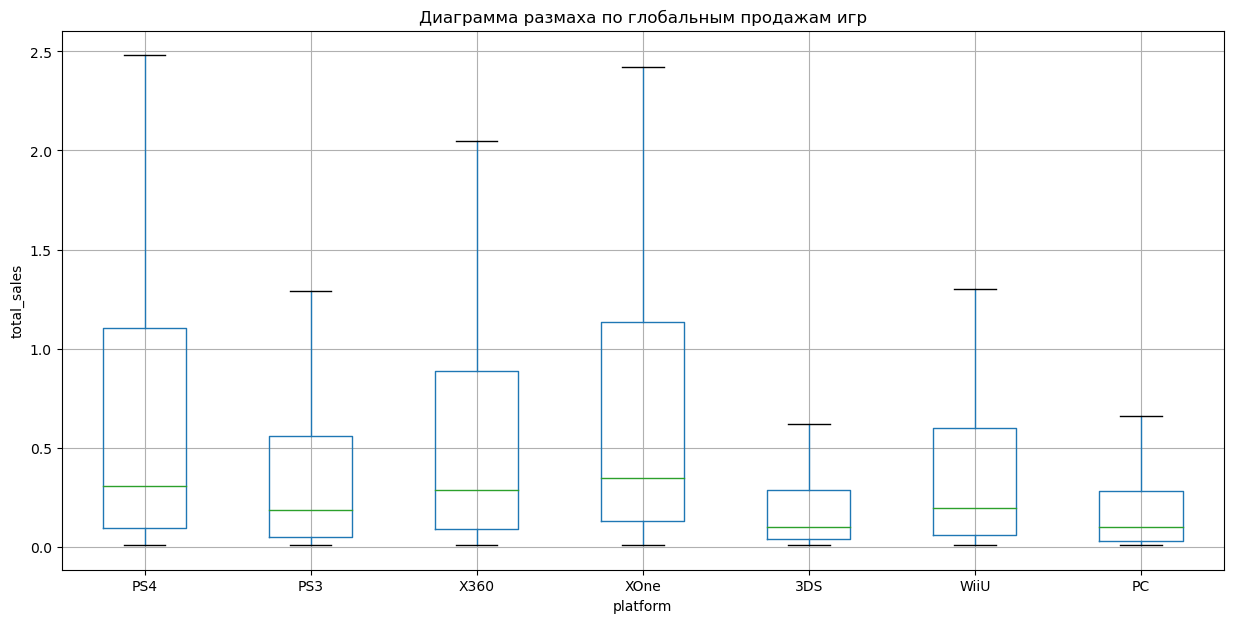

In [30]:
# создадим перечень из 7 наиболее продаваемых платформ
columns = ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU', 'PC']
(
    # перегруппируем таблицу
    data_act.pivot_table(index = 'name', columns = 'platform', values = 'total_sales')
    # построим график
    .boxplot(column = columns, showfliers = False, figsize = (15, 7))
);
plt.xlabel('platform');
plt.ylabel('total_sales');
plt.title('Диаграмма размаха по глобальным продажам игр');

На диаграммах размаха видно, что самые продаваемые в 2015 году платформы PS4 и XOne имеют наибольший разброс данных и межквартильный размах. Достаточно большое количество игр на данных платформах имеют высокие показатели продаж. 

Однако, несмотря на достаточно значительную разницу в объеме продаж между платформами, медианное значение продаж отличается не сильно. Большое количество продаж на платформах-лидерах, вероятно так же обусловлено большим количеством игр на платформах. 

***Посмотрим, как влияют на продажи самой популярной платформы отзывы пользователей и критиков***

На продажи игр влияют различные факторы. Чтобы узнать влияют ли отзывы пользователей и критиков на продажи, необходимо изучить совместное распределение величин и рассчитать корреляцию - величину, характеризующую взаимосвязь двух или нескольких величин. Чем ближе коэффициент корреляции к крайним значениям 1 или -1, тем теснее линейная взаимосвязь

Оценим влияние отзывов критиков на продажи на самой популярной платформе PS4.

In [31]:
# создадим срез данных
data_act_ps4=data_act.query('platform == "PS4"')

In [32]:
# расчет коэффициента корреляции
data_act_ps4['total_sales'].corr(data_act_ps4['critic_score']).round(2)

0.43

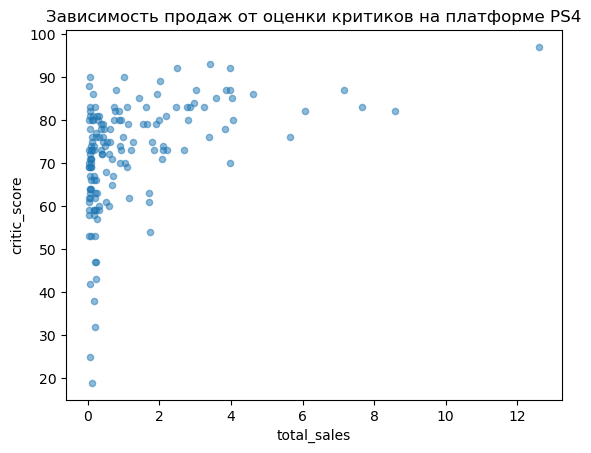

In [33]:
# вывод графика зависимости параметров total_sales и critic_score
data_act_ps4.plot(x='total_sales', y = 'critic_score', 
                  kind = 'scatter', alpha = 0.5, title= 'Зависимость продаж от оценки критиков на платформе PS4');

Размер коэффициента корреляции (0.43) и форма графика свидетельствуют о слабой связи между показателями. Вероятно, на продажи  игр другие факторы влияют сильнее, отзывы критиков.

Оценим влияние отзывов пользователей на продажи на платформе PS4.

In [34]:
# расчет коэффициента корреляции
data_act_ps4['total_sales'].corr(data_act_ps4['user_score']).round(2)

0.02

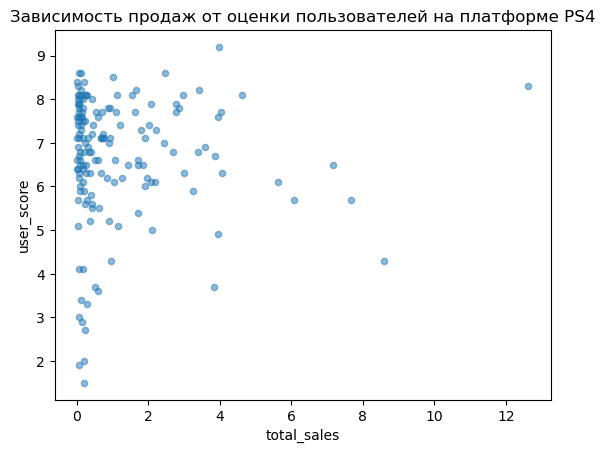

In [35]:
# вывод графика зависимости параметров total_sales и user_score
data_act_ps4.plot(x='total_sales', y = 'user_score', 
                  kind = 'scatter', alpha = 0.5, title= 'Зависимость продаж от оценки пользователей на платформе PS4');

Коэффициент корреляции практически равен 0. Связь между продажами и оценкой пользователей отсутствует. 

***Соотнесем сделанные выводы с продажами игр на других платформах***

Оценим влияние отзывов критиков на продажи на других платформах.

In [36]:
# создадим срез данных
data_act_other=data_act.query('platform != "PS4"')

In [37]:
# расчет коэффициента корреляции
data_act_other['total_sales'].corr(data_act_other['critic_score']).round(2)

0.3

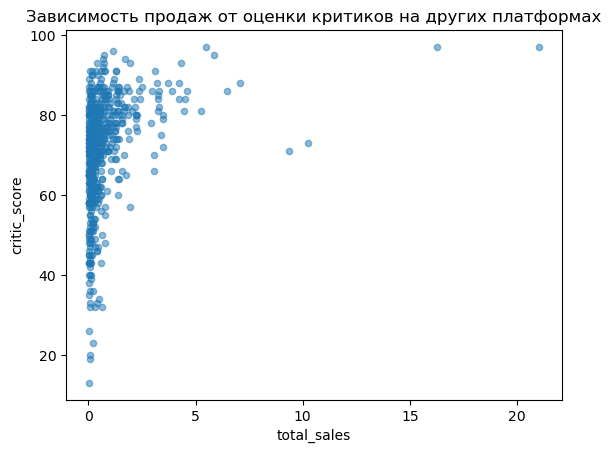

In [38]:
# вывод графика зависимости параметров total_sales и critic_score
data_act_other.plot(x='total_sales', y = 'critic_score', 
                    kind = 'scatter', alpha = 0.5, title= 'Зависимость продаж от оценки критиков на других платформах');

Размер коэффициента корреляции (0.3) и форма графика свидетельствуют о слабой связи между показателями, аналогично с данными по платформе PS4. Вероятно, на продажи  игр другие факторы влияют сильнее, отзывы критиков.

Оценим влияние отзывов пользователей на продажи на других платформах.

In [39]:
# расчет коэффициента корреляции
data_act_other['total_sales'].corr(data_act_other['user_score']).round(3)

-0.002

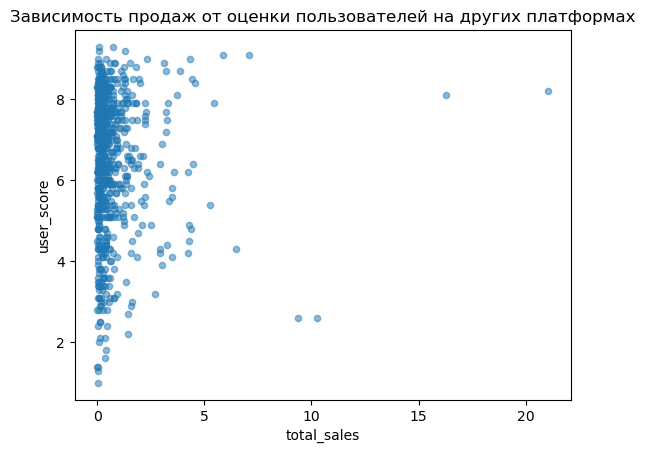

In [40]:
# вывод графика зависимости параметров total_sales и user_score
data_act_other.plot(x='total_sales', y = 'user_score', 
                    kind = 'scatter', alpha = 0.5, title= 'Зависимость продаж от оценки пользователей на других платформах');

Как и на платформе PS4, на других платформах также отсутствует связь между продажами и оценкой пользователей. Коэффициент корреляции практически равен 0.

***Посмотрим на общее распределение игр по жанрам***

Выведем данные о медианных продажах по жанрам за каждый год актуального периода. Поскольку на медианное значение вбросы практически не влияют, то оно будет более точным по сравнению со средним значением.

In [41]:
(
    # сделаем свод по столбцу platform и выведем продажи за каждый год актуального периода
    data_act.pivot_table(index = 'genre', columns = 'year_of_release', values = 'total_sales', aggfunc = 'median')
    # отсортируем по убыванию
    .sort_values(by = 2015, ascending = False)
)

year_of_release,2013,2014,2015
genre,,,
Shooter,0.340,0.660,0.925
Simulation,0.105,0.120,0.200
Misc,0.175,0.160,0.190
Racing,0.340,0.170,0.150
Sports,0.370,0.460,0.120
Role-Playing,0.180,0.110,0.105
Fighting,0.155,0.130,0.100
Platform,0.385,0.830,0.100
Action,0.200,0.205,0.070


Данные таблицы показывают, что предпочнения пользователей постоянно меняются. По итогам 2015 года самыми продаваемыми жарами были: Shooter, Simulation, Misc, Racing и Sports. Продажи игр в жанре Racing имеют тенденцию к снижению. Изменения продаж в жанрах Misc и Sports разнонаправленные. А вот продажи в жанрах Shooter и Simulation ежегодно растут. Поэтому данные жанры являются наиболее потенциально прибыльным. 

Наименее популярные жанры: Adventure, Strategy и Puzzle. Практически у всех из них продажи ежегодно сокращаются.

<a id="4"></a>
## Портрет пользователя каждого региона ###

Определим различные показатели для пользователей следующих регионов:

- Северная Америка (na);
- Европа (eu);
- Япония (jp).

***Самые популярные платформы (ТОП-5)***

Выведем информацию о ТОП-5 самых популярных платформ в разных регионах.

In [42]:
print('Общая сумма продаж в Северной Америке:', data_act['na_sales'].sum())
(
    # сделаем свод по столбцу platform и выведем продажи в na
    data_act.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
    # отсортируем по убыванию
    .sort_values(by = 'na_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'na_sales': 'продажи в Северной Америке'}).head()
)

Общая сумма продаж в Северной Америке: 392.78


,продажи в Северной Америке
platform,
PS4,87.25
X360,80.97
XOne,78.85
PS3,62.83
3DS,34.06


In [43]:
print('Общая сумма продаж в Европе:', data_act['eu_sales'].sum())
(
    # сделаем свод по столбцу platform и выведем продажи в eu
    data_act.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
     # отсортируем по убыванию
    .sort_values(by = 'eu_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'eu_sales': 'продажи в Европе'}).head()
)

Общая сумма продаж в Европе: 341.01


,продажи в Европе
platform,
PS4,109.31
PS3,66.55
XOne,41.96
X360,41.81
3DS,28.63


In [44]:
print('Общая сумма продаж в Японии:', data_act['jp_sales'].sum().round(2))
(
    # сделаем свод по столбцу platform и выведем продажи в jp
    data_act.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
     # отсортируем по убыванию
    .sort_values(by = 'jp_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'jp_sales': 'продажи в Японии'}).head()
)

Общая сумма продаж в Японии: 121.47


,продажи в Японии
platform,
3DS,59.78
PS3,22.05
PSV,15.03
PS4,10.22
WiiU,10.21


В Северной Америке и в Европе лидером продаж является платформа PS4. Доля продаж PS4 в общем объеме продаж в Северной Америке составляет 22.2%, а в Европе - 32.1%.  В целом ТОП-5 в этих регионах выглядит примерно одинаково. Помимо PS4 в него входят следующие платформы: PS3, XOne, X360 и 3DS. Однако их позиции в ТОП-5 в Северной Америке и Европе все же немного отличаются.

В Японии перечень самых популярных платформ иной. Здесь лидером является платформа 3DS (49.2% от общих продаж), которая замыкает ТОП-5 в Северной Америке и Европе (чуть более 8% от общих продаж в каждом из этих регионов). Далее следуют платформы: PS3, PSV, PS4 и WiiU. Данная разница объясняется большой популярностью игровой консоли Nintendo в Японии, что и приводит к большим продажам на платформах 3DS и WiiU.

***Самые популярные жанры (ТОП-5)***

Выведем информацию о ТОП-5 самых популярных жанров в разных регионах.

In [45]:
print('Oбщая сумма продаж в Северной Америке:', data_act['na_sales'].sum())
(
    # сделаем свод по столбцу genre и выведем продажи в na
    data_act.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
    # отсортируем по убыванию
    .sort_values(by = 'na_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'na_sales': 'продажи в Северной Америке'}).head()
)

Oбщая сумма продаж в Северной Америке: 392.78


,продажи в Северной Америке
genre,
Action,116.76
Shooter,93.50
Sports,57.73
Role-Playing,40.51
Misc,26.73


In [46]:
print('Oбщая сумма продаж в Европе:', data_act['eu_sales'].sum())
(
    # сделаем свод по столбцу genre и выведем продажи в eu
    data_act.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
     # отсортируем по убыванию
    .sort_values(by = 'eu_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'eu_sales': 'продажи в Европе'}).head()
)

Oбщая сумма продаж в Европе: 341.01


,продажи в Европе
genre,
Action,107.45
Shooter,71.96
Sports,48.51
Role-Playing,32.69
Misc,19.38


In [47]:
print('Oбщая сумма продаж в Японии:', data_act['jp_sales'].sum().round(2))
(
    # сделаем свод по столбцу genre и выведем продажи в jp
    data_act.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
     # отсортируем по убыванию
    .sort_values(by = 'jp_sales', ascending = False)
    # переименуем столбец и выведем топ-5
    .rename(columns={'jp_sales': 'продажи в Японии'}).head()
)

Oбщая сумма продаж в Японии: 121.47


,продажи в Японии
genre,
Role-Playing,44.43
Action,33.42
Misc,8.16
Fighting,6.90
Shooter,5.55


В Северной Америке и в Европе ТОП-5 самых популярных жанров выглядит абсолютно одинаково:

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Их доли продаж в указанных регионах отличаются незначительно. Например, доля продаж игр в самом популярном жанре Action в Северной Америке составляет 29.7%, а в Европе - 31.5%.

В Японии самым популярным жанром является Role-Playing (36.6% от общих продаж). В Северной Америке и Европе данный жанр занимает лишь 4 место по популярности. Далее следуют Action (лидер в Северной Америке и Европе), Misc, Fighting и Shooter.

***Оценка влияния рейтинга ESRB на продажи в отдельных регионах***

Для проведения оценки, построим график распределения продаж в каждом из регионов по рейтингам ESRB.

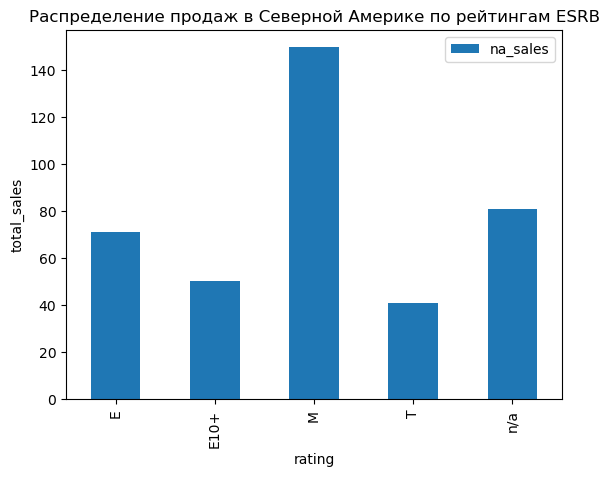

In [48]:
(
    # сделаем свод по столбцу rating и вычислим суммарные продажи в na
    data_act.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
    # построим столбчатый график 
    .plot(kind = 'bar', title= 'Распределение продаж в Северной Америке по рейтингам ESRB', ylabel = 'total_sales')
);

In [49]:
print('Oбщая сумма продаж в Северной Америке:', data_act['na_sales'].sum())
(
    # сделаем свод по столбцу genre и выведем продажи в na
    data_act.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
    # отсортируем по убыванию
    .sort_values(by = 'na_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'na_sales': 'продажи в Северной Америке'}).head()
)

Oбщая сумма продаж в Северной Америке: 392.78


,продажи в Северной Америке
rating,
M,149.54
n/a,80.89
E,71.08
E10+,50.43
T,40.84


В Северной Америке наибольшие продажи приходятся на игры, с рейтингом М - «Для взрослых». Также достаточно высокие продажи имеют игры с рейтингом Е («Для всех») и Е10+(«Для всех от 10 лет и старше»). Однако около 21% продаваемых игр вообще не имеют присвоенного рейтинга ESRB.

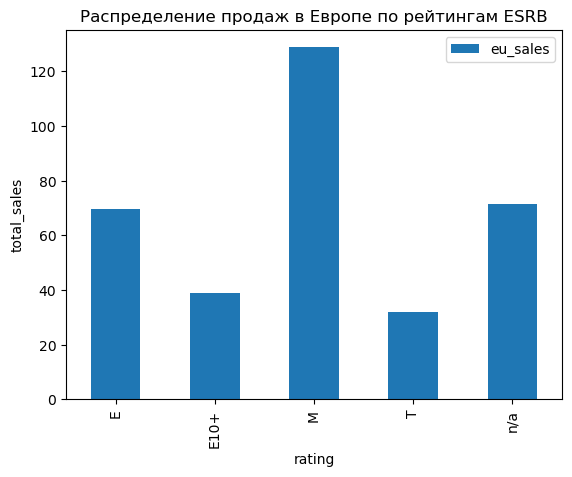

In [50]:
(
    # сделаем свод по столбцу rating и вычислим суммарные продажи в eu
    data_act.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
    # построим столбчатый график 
    .plot(kind = 'bar', title= 'Распределение продаж в Европе по рейтингам ESRB', ylabel = 'total_sales')
);

In [51]:
print('Oбщая сумма продаж в Европе:', data_act['eu_sales'].sum())
(
    # сделаем свод по столбцу genre и выведем продажи в eu
    data_act.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
     # отсортируем по убыванию
    .sort_values(by = 'eu_sales', ascending = False)
    # переименуем столбец и выведем ТОП-5
    .rename(columns={'eu_sales': 'продажи в Европе'}).head()
)

Oбщая сумма продаж в Европе: 341.01


,продажи в Европе
rating,
M,128.78
n/a,71.44
E,69.75
E10+,38.88
T,32.16


В Европе ситуация аналогичная.

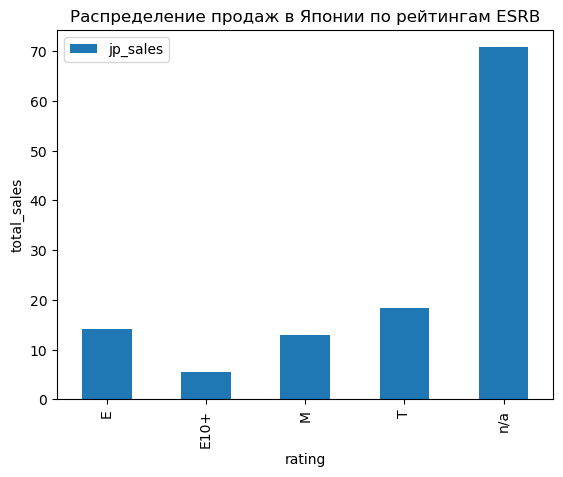

In [52]:
(
    # сделаем свод по столбцу rating и вычислим суммарные продажи в jp
    data_act.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
    # построим столбчатый график 
    .plot(kind = 'bar', title= 'Распределение продаж в Японии по рейтингам ESRB', ylabel = 'total_sales')
);

In [53]:
print('Oбщая сумма продаж в Японии:', data_act['jp_sales'].sum().round(2))
(
    # сделаем свод по столбцу genre и выведем продажи в jp
    data_act.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
     # отсортируем по убыванию
    .sort_values(by = 'jp_sales', ascending = False)
    # переименуем столбец и выведем топ-5
    .rename(columns={'jp_sales': 'продажи в Японии'}).head()
)

Oбщая сумма продаж в Японии: 121.47


,продажи в Японии
rating,
n/a,70.73
T,18.32
E,14.07
M,12.91
E10+,5.44


В Японии подавляющее большинство продаваемых игр не имеет рейтинга ESRB.

Система ESRB (Entertainment Software Rating Board) определяет рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. В Великобритании и большинстве европейских стран действует система PEGI (Pan European Game Information). В Японии действует система CERO (Computer Entertainment Rating Organization).

Таким образом рейтинг ESRB может влиять только на продажи игр в Северной Америке. Для других регионов целесообразнее оценивать влияние на продажи других рейтинговых систем.

На основании графиков можно сделать вывод, что в Северной Америке наличие рейтинга ESRB влияет на продажи, поскольку 79% проданных игр имеют такой рейтинг и большинство из них относится к рейтингу М («Для взрослых»).

В Европе также 79% проданных игр имеют такой рейтинг ESRB и большинство из них также относится к рейтингу М («Для взрослых»). Но здесь такой высокий показатель скорее объясняется схожим по составу набором продаваемых игр в Северной Америке и Европе. То есть в Европе продается много игр, которые имеют рейтинг ESRB, поскольку они продаются и в Северной Америке. Для европейского рынка правильнее оценивать влияние на продажи наличие и значение рейтинга PEGI.

В Японии рейтинг ESRB не оказывает никакого влияния на продажи в связи с тем, что лишь небольшая доля продаваемых игр имеет данный рейтинг. Видимо в Японии выпускается большое количество игр для внутреннего рынка.

<a id="5"></a>
## Проверьте гипотезы

Произведем проверку следующих гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Установим уровень статистической значимости в размере 5%, что является общепринятым пороговым значением. Установка уровня статистической значимости менее 5% приведет к тому, что в среднем в одном исследовании из 20 гипотеза будет отвергнута не потому, что она неверна, а потому, что реальное значение случайно далеко «уехало» от предполагаемого.

***Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

Проверка гипотез начинается с формулировки нулевой гипотезы H_0. Сформулируем ее следующим образом:

H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC.


Исходя из H_0 формулируется альтернативная гипотеза H_a. Это утверждение, которое принимается верным, если отбрасывается H_0. Сформулируем альтернативную гипотезу:

H_a: Средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC.

Для проверки гипотезы о равенстве средних пользовательских рейтингов воспользуемся методом scipy.stats.ttest_ind.

In [54]:
# создание перечня оценок пользователей платформы XOne
xbox_one = data_act.loc[(data_act['platform'] == 'XOne') & (data_act['user_score'] >= 0)]['user_score']
# создание перечня оценок пользователей платформы PC
pc = data_act.loc[(data_act['platform'] == 'PC') & (data_act['user_score'] >= 0)]['user_score']
# проведение стат. теста о равенстве пользовательских рейтингов
results = st.stats.ttest_ind(xbox_one, pc, equal_var = False)
# установим уровень статистической значимости
alpha = 0.05 
# вывод на экран величины p-value
print('p-value:', results.pvalue) 
# сравнение значения p-value с alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее значение равно почти 28.7%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими оценками. Следовательно мы не отвергаем нулевую гипотезу.

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые не опровергнута!

***Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные***

Сформулируем нулевую гипотезу H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports.

Сформулируем альтернативную гипотезу H_a: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports.

In [55]:
# создание перечня оценок пользователей жанра Action
action = data_act.loc[(data_act['genre'] == 'Action') & (data_act['user_score'] >= 0)]['user_score']
# создание перечня оценок пользователей жанра Sports
sports = data_act.loc[(data_act['genre'] == 'Sports') & (data_act['user_score'] >= 0)]['user_score']
# проведение стат. теста о равенстве пользовательских рейтингов
results = st.stats.ttest_ind(action, sports, equal_var = False)
# установим уровень статистической значимости
alpha = 0.05 
# вывод на экран величины p-value
print('p-value:', results.pvalue) 
# сравнение значения p-value с alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 3.5076737062533423e-19
Отвергаем нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее значение практически равно 0. В связи с этим  мы  отвергаем нулевую гипотезу, что средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports.

Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные не опровергнута!

<a id="6"></a>
## Вывод

В период с 1980 по 1993 года в год выпускалось не более 100 игр. С 1994 по 2000 год наблюдался умеренный рост количества выпускаемых игр. С 2000 года происходит стремительный рост, который достигает своего пика в 2008 году. Далее идет снижение, а с 2014 года опять начинается умеренный рост.

Наибольшее количество продаж за весь период наблюдения приходилось на игры с платформы PS2 - 1 233 млн. копий.

Продажи на каждой из платформ в среднем длятся 10 лет. Однако есть и исключения. Новые платформы появляются примерно 1 раз в 2-3 года. Закрытие платформ происходит немного реже.

Актуальным для построения прогноза на 2017 год является период с 2013 по 2015 год, поскольку этот период и наиболее однородный, отражает текущие тенденции в изменении количества выходящих игр за год, а также учитывает средний период открытия и закрытия платформ. Данные за 2016 год представлены не в полном объеме.

По итогам 2015 года самыми потенциально прибыльными платформами являлись PS4 и XOne. На протяжении 3-х последних лет продажи игр на этих платформах росли. Эти же платформы имеют наибольший разброс данных и межквартильный размах. То есть достаточно большое количество игр на данных платформах имеют высокие показатели продаж. Однако медианное значение продаж на различных платформах отличается незначительно, следовательно большое количество продаж на платформах обусловлено большим количеством игр на каждой из них.

На основании проведенного анализа можно сделать вывод о том, что оценки критиков оказывают незначительное влияния на продажи игр. А оценки пользователей - вовсе не оказывают.

В 2015 году  жанрами с самыми высокими продажами были: Shooter, Simulation, Misc, Racing и Sports. Жанры Shooter и Simulation являются наиболее потенциально прибыльными.

При составлении портрета пользователей Северной Америки, Европы и Японии было выявлено следующее:

-	В Северной Америке и в Европе лидируют одни и те же платформы. Наиболее продаваемая из них - PS4. В Японии лидером является платформа 3DS.

-	Наиболее популярные жанры игр в Северной Америке и в Европе так же совпадают. К ним относятся Action, Shooter и Sports. В Японии самыми популярными жанрам являются Role-Playing, Action и Misc.

-	Рейтинг ESRB влияет на продажи игр в Северной Америке и наиболее популярны здесь игры с рейтингом М («Для взрослых»). Однако в Европе и Японии действуют свои системы рейтингов. В связи с этим не целесообразно оценивать влияние рейтинга ESRB на продажи в Европе и Японии. 

Проверка гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые показала, достаточную вероятность данного равенства в связи с чем, гипотеза не была отвергнута.

Проверка гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные показала, практически нулевую вероятность равенства средних рейтингов. В связи с этим, гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные не была отвергнута.